# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


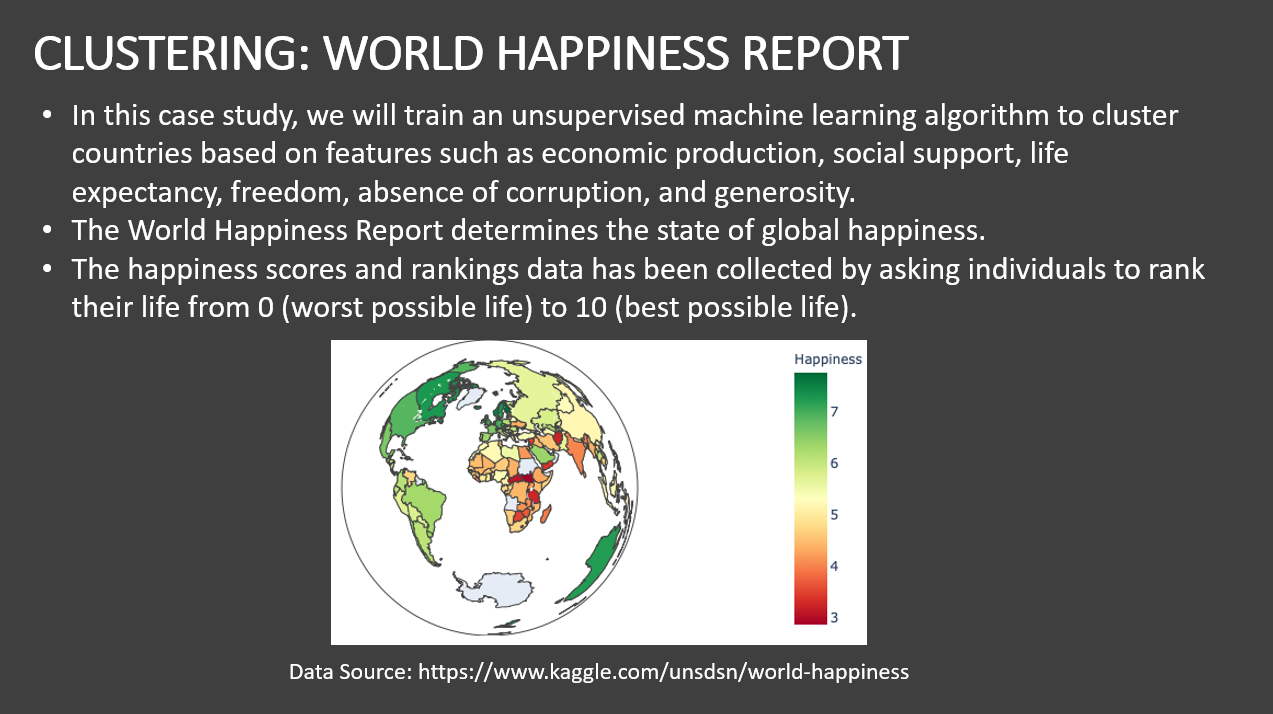

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
# Get the required dependencies
! pip install bubbly
! pip install iplot
! pip install chart_studio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import csv file into pandas dataframe
happy_df= pd.read_csv('happiness_report.csv')

In [4]:
# print the first 5 rows of the dataframe
happy_df

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

MINI CHALLENGE #1: 
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check. 

In [5]:
happy_df.shape

(156, 9)

In [6]:
happy_df[happy_df['Country or region'] == 'India']

Overall rank Country or region  Score  GDP per capita  Social support  \
139           140             India  4.015           0.755           0.765   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
139                    0.588                         0.498         0.2   

     Perceptions of corruption  
139                      0.085

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
# Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

In [10]:
# check the number of duplicated entries in the dataframe
# since there are no duplicates, no further action is required
happy_df.duplicated().sum()

0

MINI CHALLENGE #2:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [11]:
country_with_max_score = happy_df[happy_df['Score'] == happy_df['Score'].max()]['Country or region'].iloc[0]
perception_of_corruption = happy_df[happy_df['Score'] == happy_df['Score'].max()]['Perceptions of corruption'].iloc[0]
print('Country with maximum happiness score : ',country_with_max_score)
print(f'{country_with_max_score}\'s perception of corruption : ',perception_of_corruption)

Country with maximum happiness score :  Finland
Finland's perception of corruption :  0.393


# TASK #4: PERFORM DATA VISUALIZATION - PART #1

<Figure size 1440x1440 with 0 Axes>

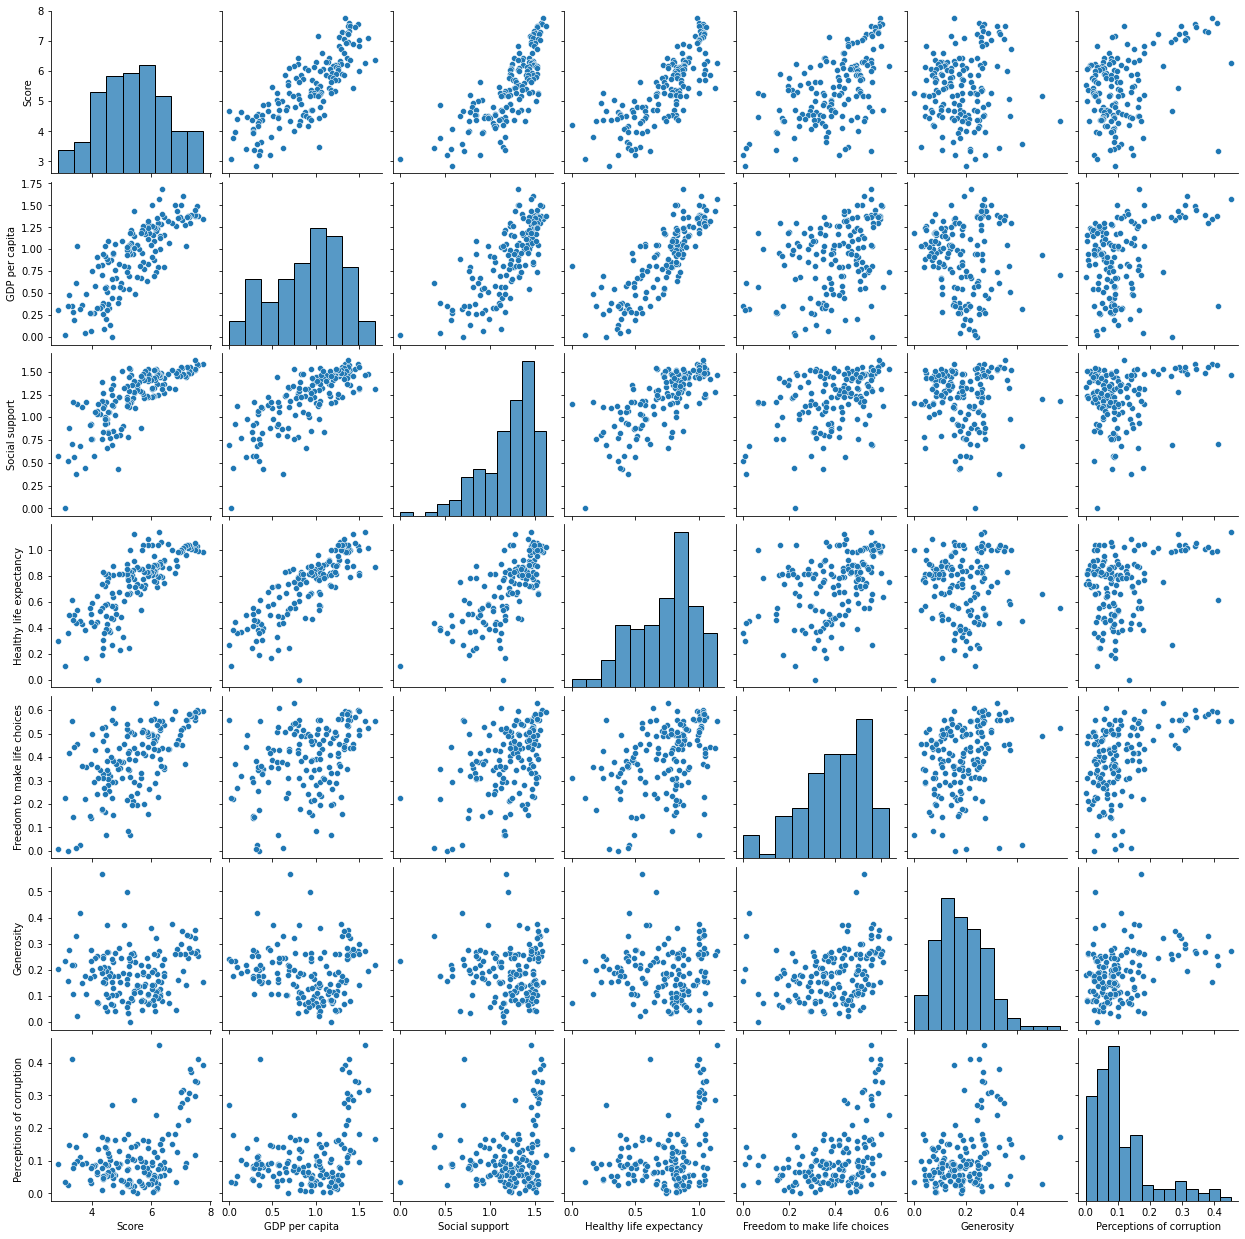

In [12]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 
sns.pairplot(happy_df.drop(['Overall rank','Country or region'],axis=1))


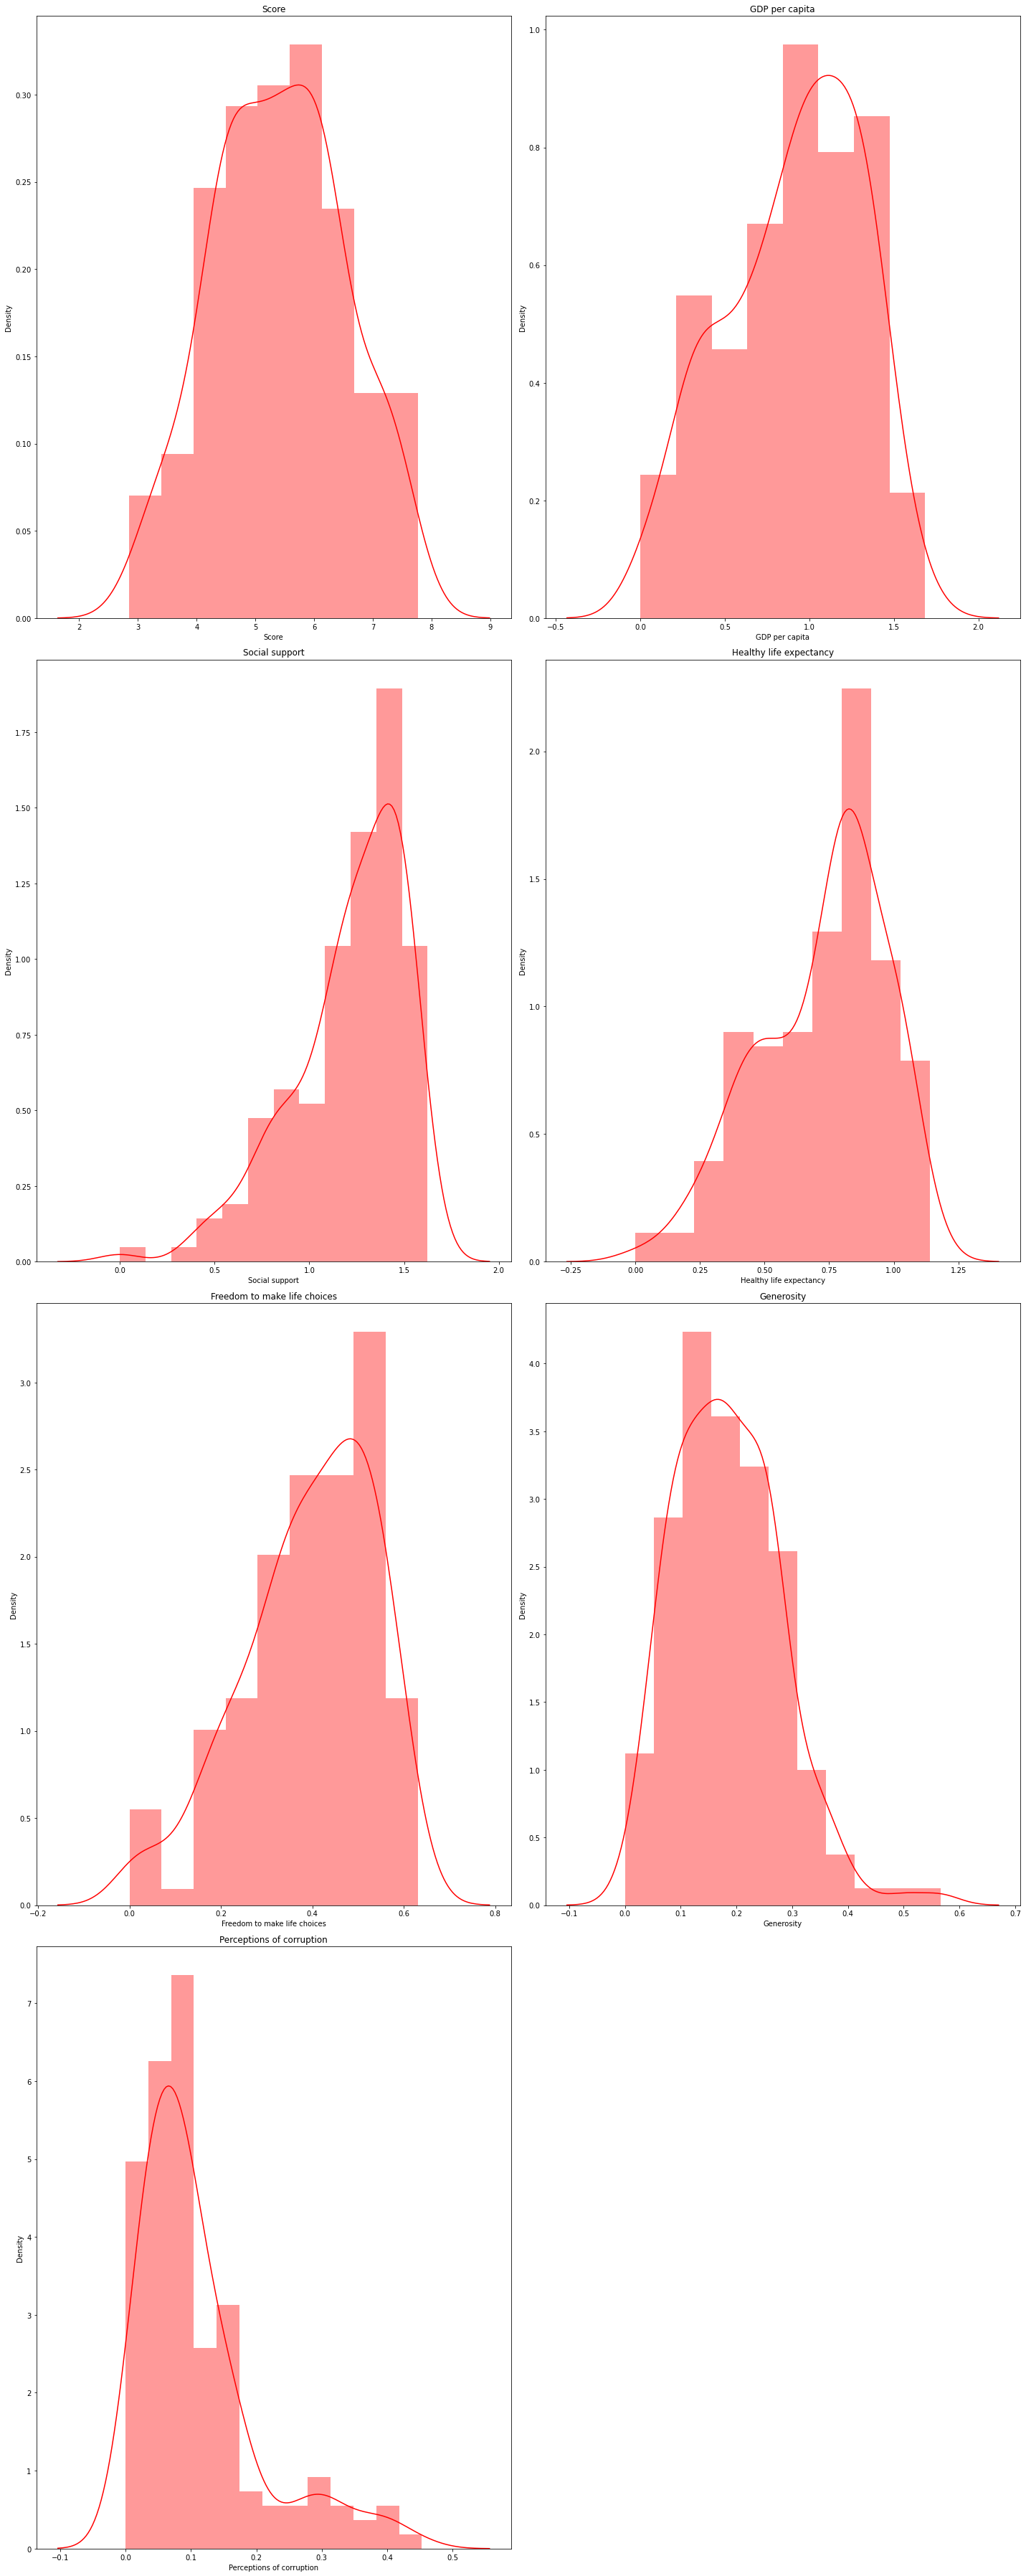

In [13]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(4, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results. 


<AxesSubplot:>

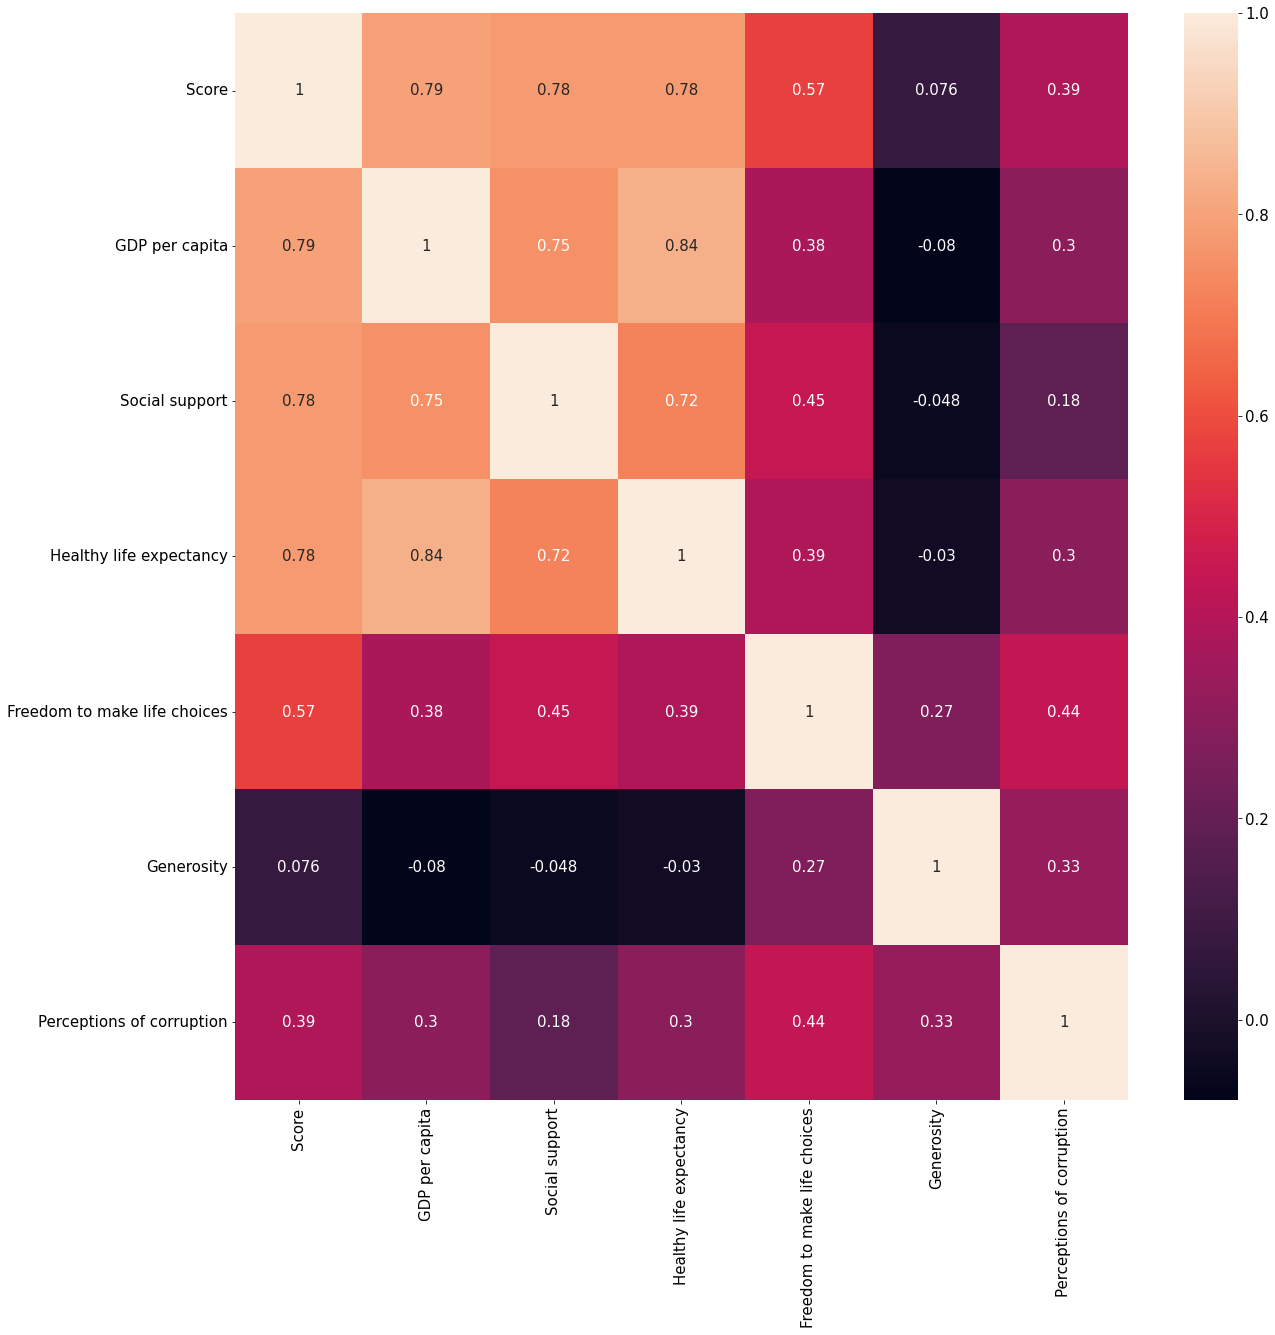

In [14]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':15})
sns.heatmap(happy_df[columns].corr(),annot=True)

# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [15]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df,x='GDP per capita',y='Score',color='Score',size='Score',hover_data = happy_df.columns)
fig.update_layout(title_text = 'GDP per Capita vs Happiness Score')
fig.show()

In [16]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Score', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4: 
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

In [17]:
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score", size = 'Score', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Healthy life expectancy')
fig.show()

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [18]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [19]:
# Select the data without rank and happiness score
df_seg = happy_df.drop(['Overall rank','Country or region','Score'],axis=1)

In [20]:
df_seg.sample(frac=0.05)

GDP per capita  Social support  Healthy life expectancy  \
12            1.276           1.455                    1.029   
112           0.879           1.313                    0.477   
1             1.383           1.573                    0.996   
92            1.029           1.125                    0.893   
137           0.578           1.058                    0.426   
20            1.503           1.310                    0.825   
82            0.948           1.531                    0.667   
33            1.572           1.463                    1.141   

     Freedom to make life choices  Generosity  Perceptions of corruption  
12                          0.371       0.261                      0.082  
112                         0.401       0.070                      0.056  
1                           0.592       0.252                      0.410  
92                          0.521       0.058                      0.100  
137                         0.431       0.247                      0.087  
20                          0.598       0.262                      0.182  
82                          0.317       0.235                      0.038  
33                          0.556       0.271                      0.453

In [21]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)

In [22]:
scaled_data.shape

(156, 6)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS CLUSTERING ALGORITHM

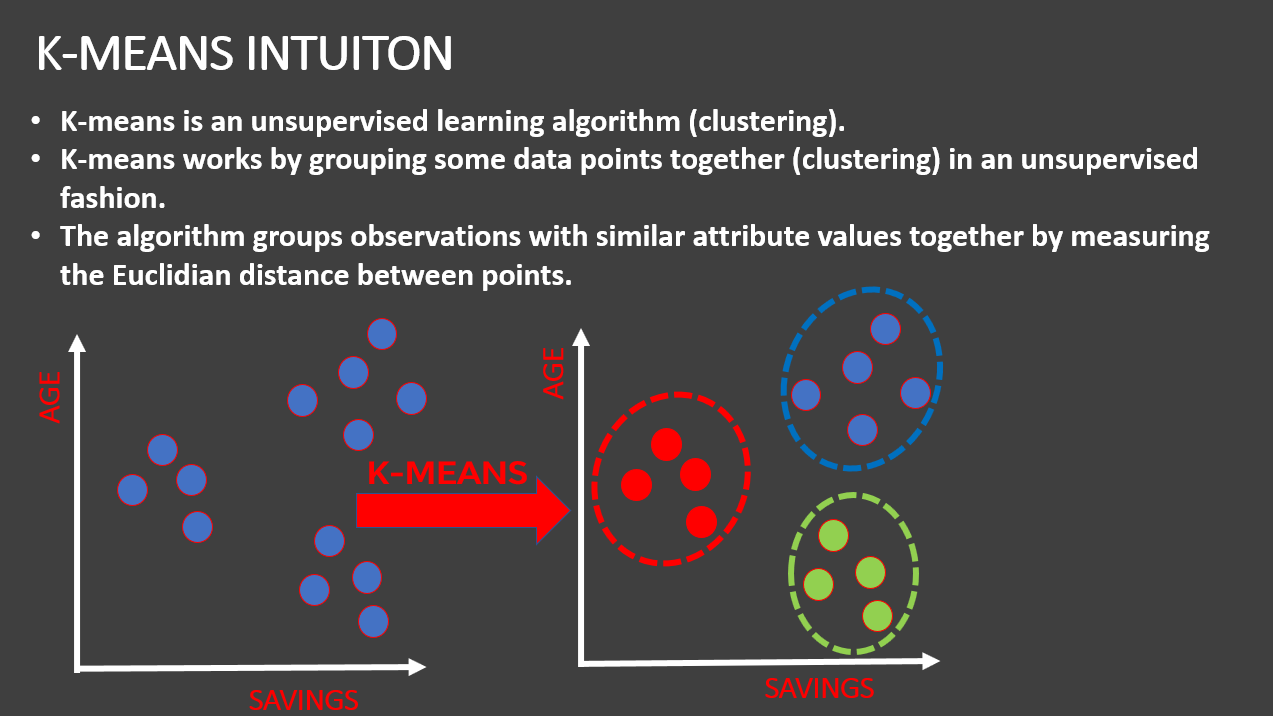

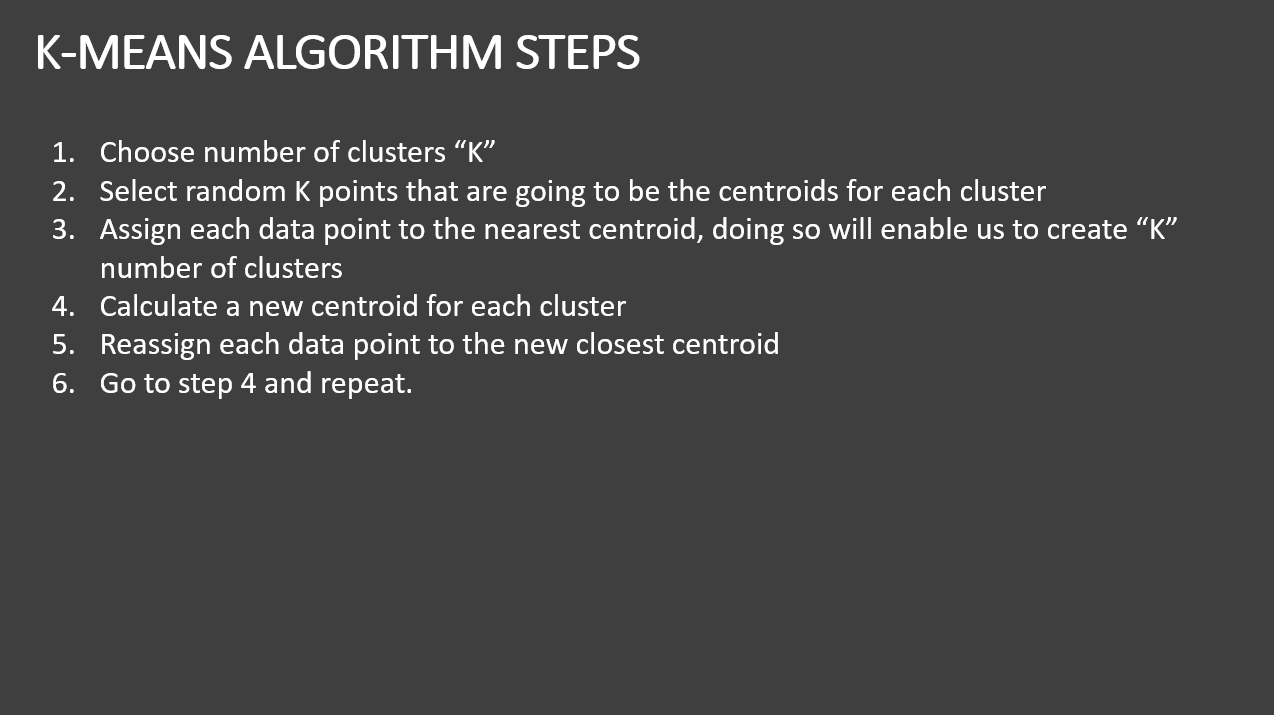

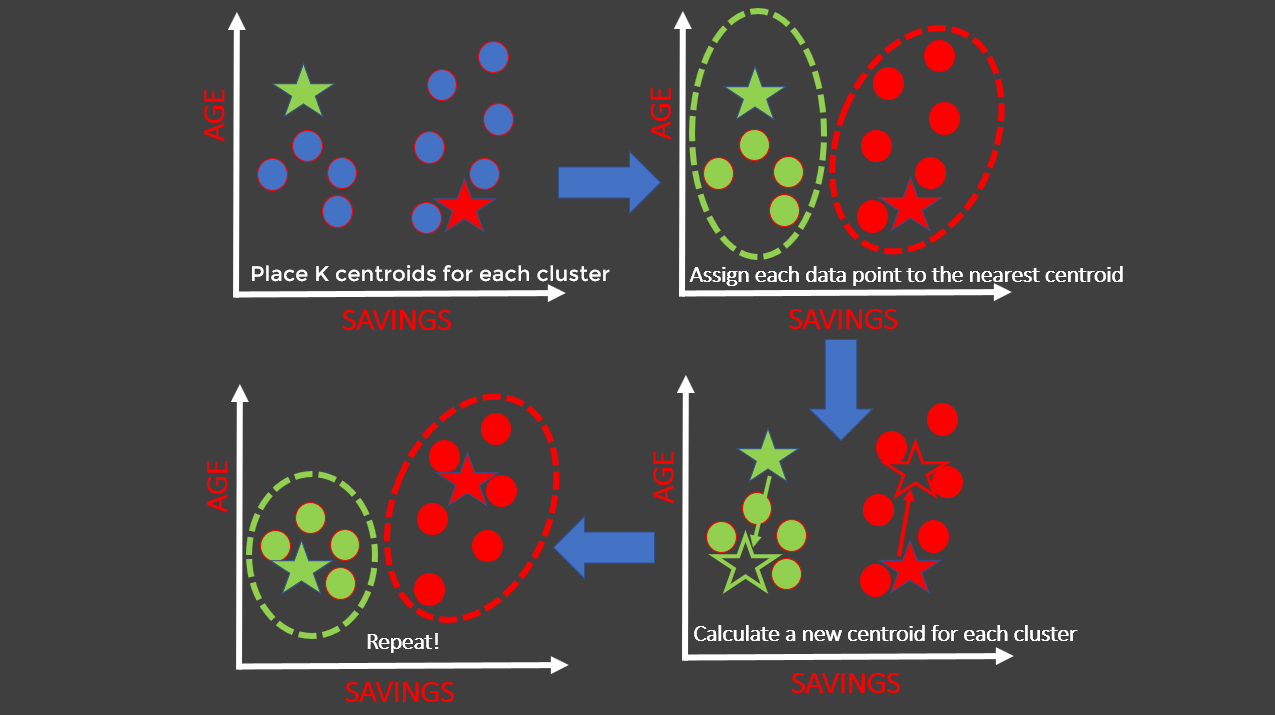

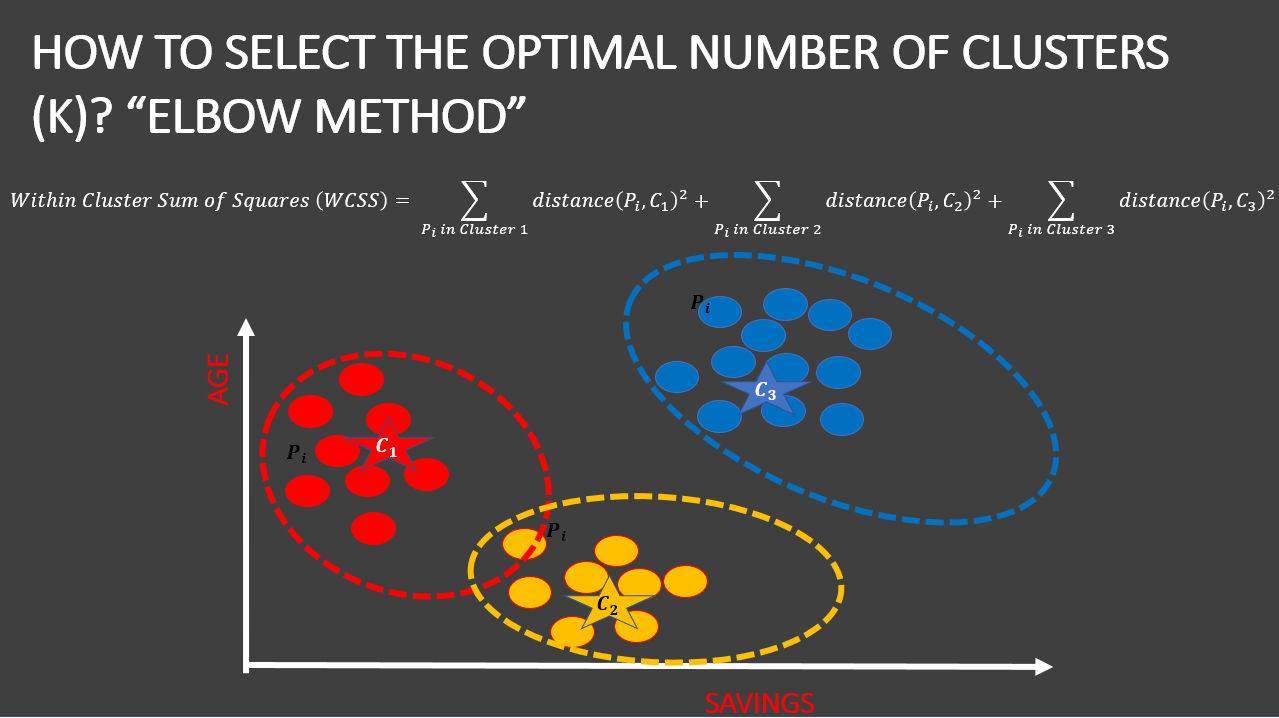

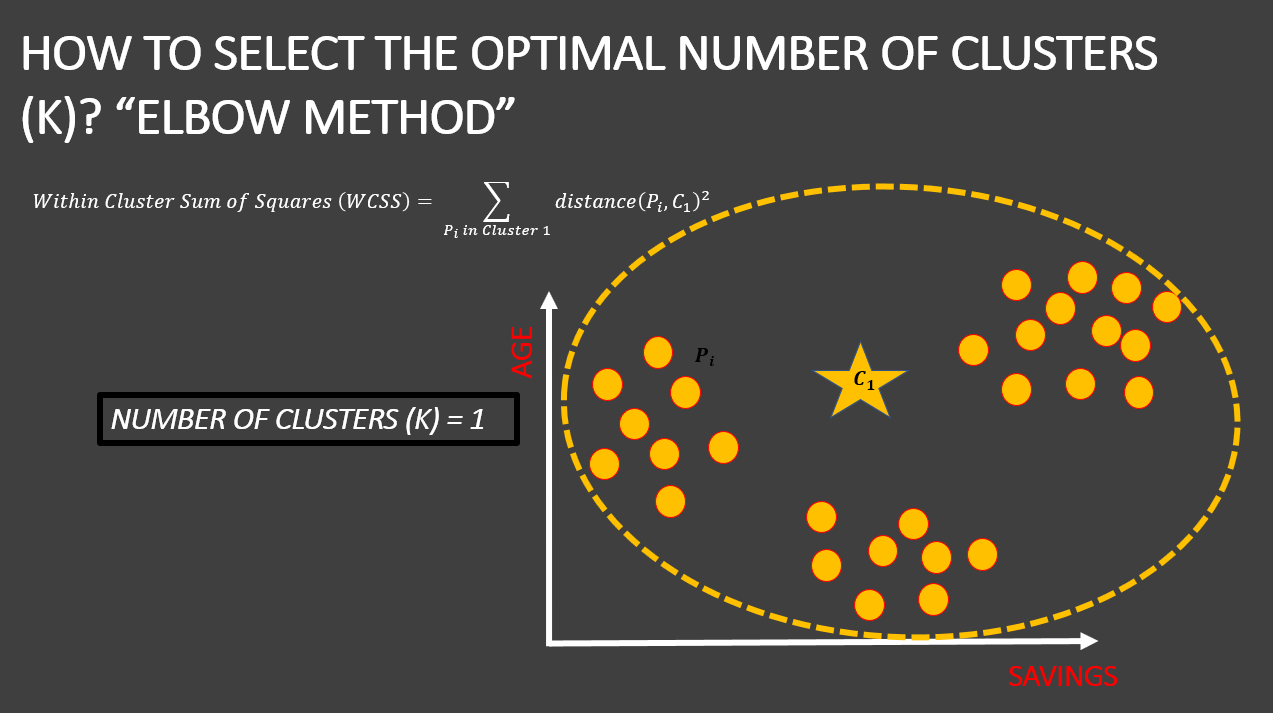

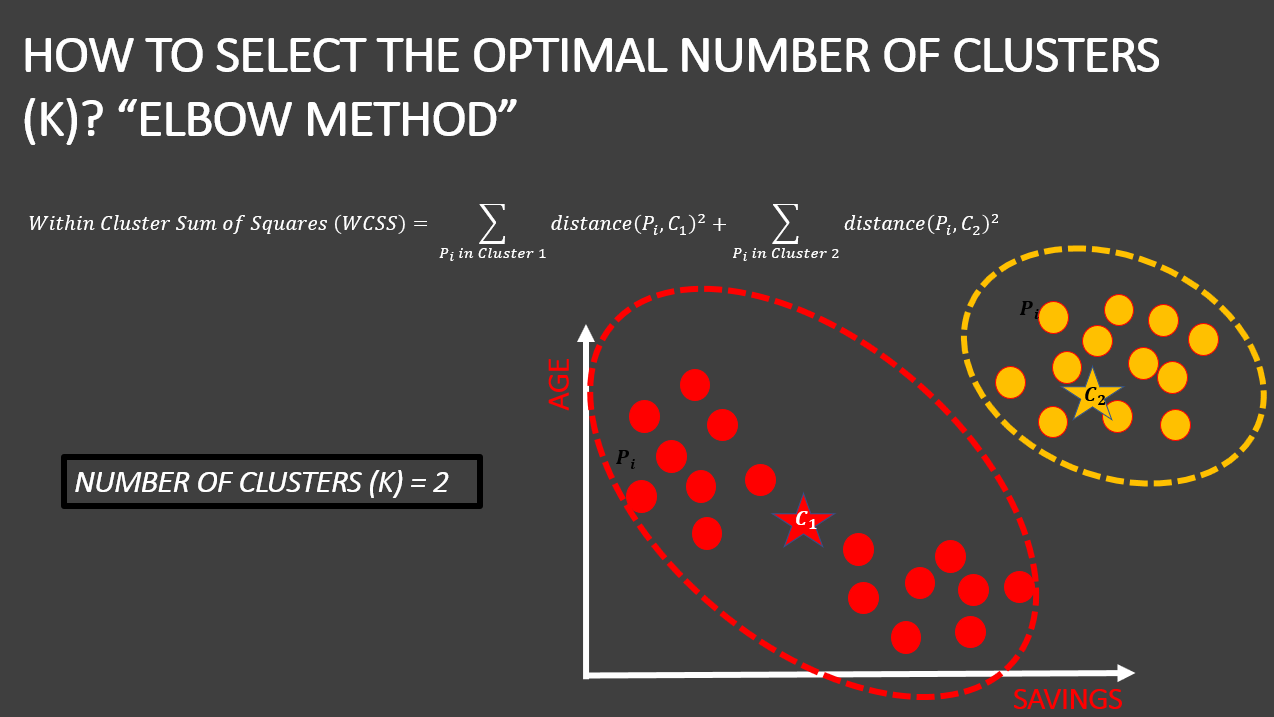

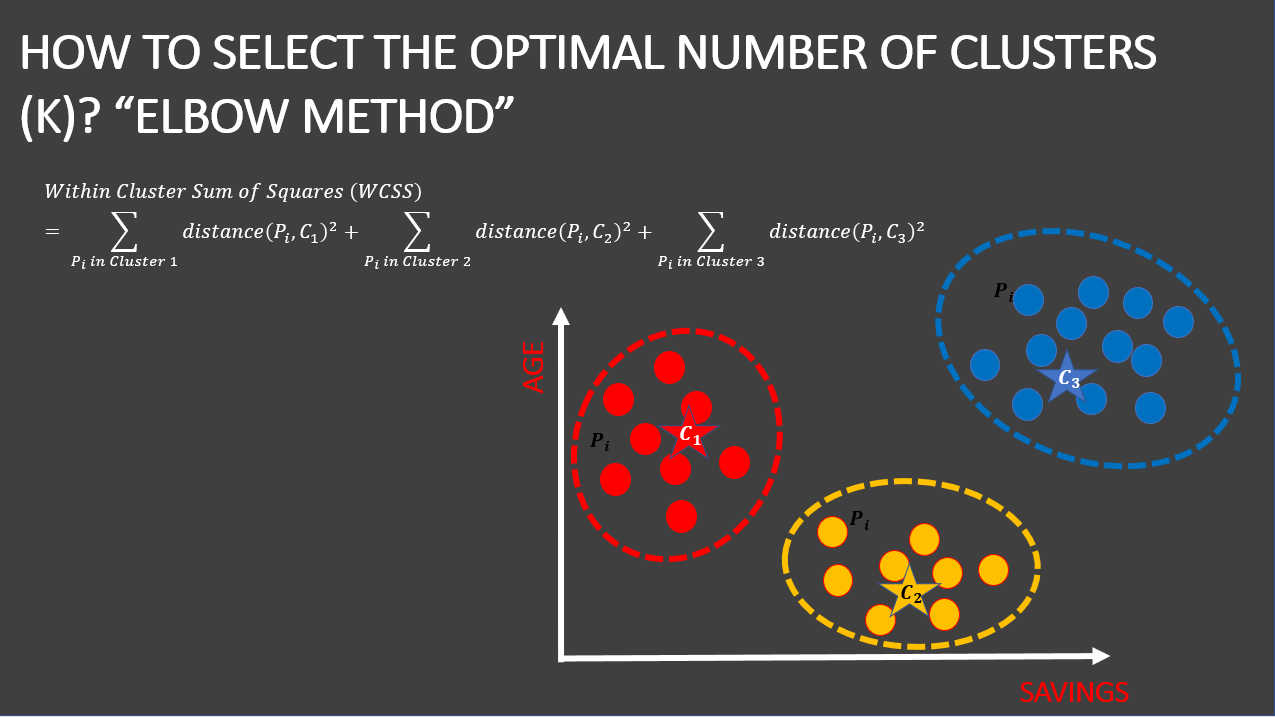

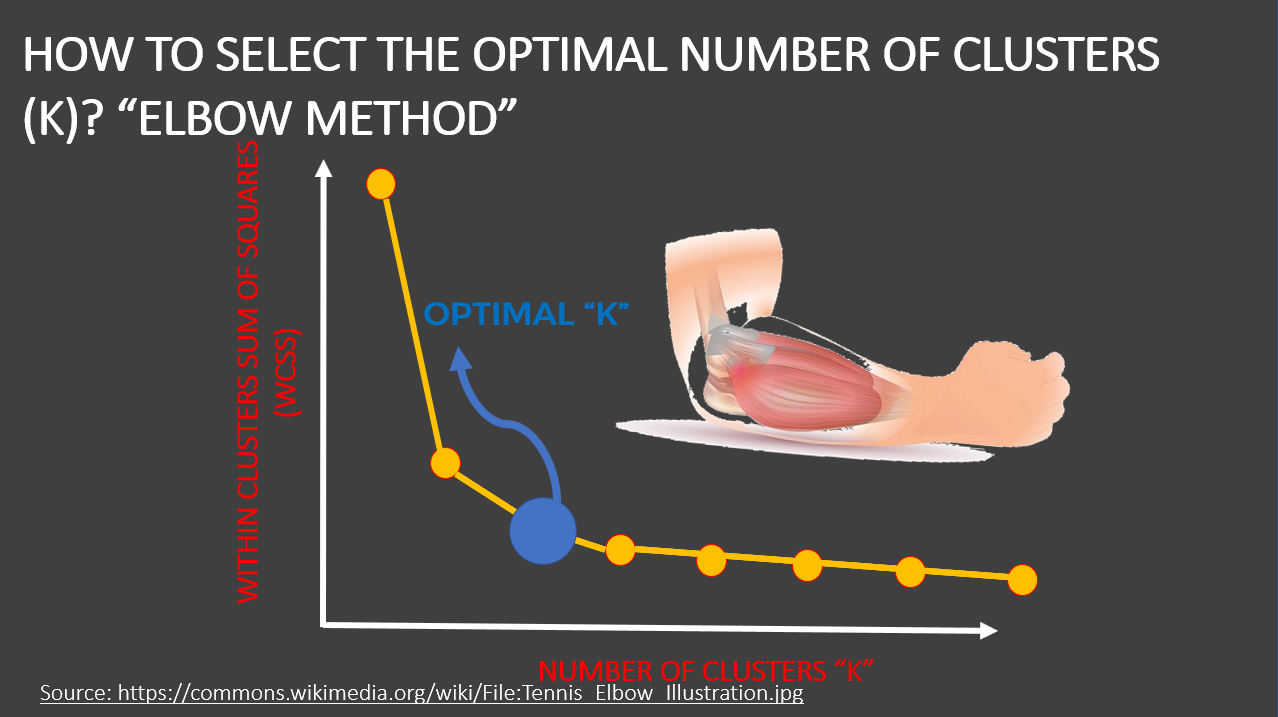

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

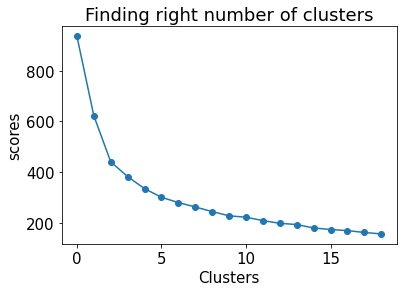

In [23]:
scores = []
for k in range(1,20):
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_data)
    scores.append(kmean.inertia_)

plt.plot(scores,'o-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

In [24]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve. 
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [25]:
kmean = KMeans(n_clusters=3)

In [26]:
kmean.fit(scaled_data)

KMeans(n_clusters=3)

In [27]:
labels = kmean.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1])

In [28]:
cluster_centers = kmean.cluster_centers_
print(cluster_centers)

[[ 1.0440483   0.84045675  0.88671774  1.04395863  1.20151704  1.46865179]
 [-1.26422926 -1.1321435  -1.24034126 -0.47156319  0.26057036 -0.11435828]
 [ 0.35269748  0.34811966  0.39301953 -0.09193823 -0.55644773 -0.43733865]]


In [29]:
cluster_centers = pd.DataFrame(data = kmean.cluster_centers_, columns = [df_seg.columns])
cluster_centers      

GDP per capita Social support Healthy life expectancy  \
0       1.044048       0.840457                0.886718   
1      -1.264229      -1.132144               -1.240341   
2       0.352697       0.348120                0.393020   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     1.043959   1.201517                  1.468652  
1                    -0.471563   0.260570                 -0.114358  
2                    -0.091938  -0.556448                 -0.437339

In [30]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


GDP per capita Social support Healthy life expectancy  \
0       1.319750       1.459464                0.939250   
1       0.403109       0.871174                0.425891   
2       1.045207       1.312634                0.820098   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     0.541679   0.298929                  0.249000  
1                     0.325217   0.209587                  0.099826  
2                     0.379439   0.132012                  0.069390

- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [31]:
labels.shape # Labels associated to each data point

(156,)

In [32]:
labels.max()

2

In [33]:
labels.min()

0

In [34]:
y_kmeans = kmean.fit_predict(scaled_data)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        0  
1         0.252                      0.410        0  
2         0.271                      0.341        0  
3         0.354                      0.118        0  
4         0.322                      0.298        0  
..          ...                        ...      ...  
151       0.217                      0.411        1  
152       0.276                      0.147        1  
153       0.158                      0.025        1  
154       0.235                      0.035        1  
155       0.202                      0.091        1  

[156 rows x 10 columns]

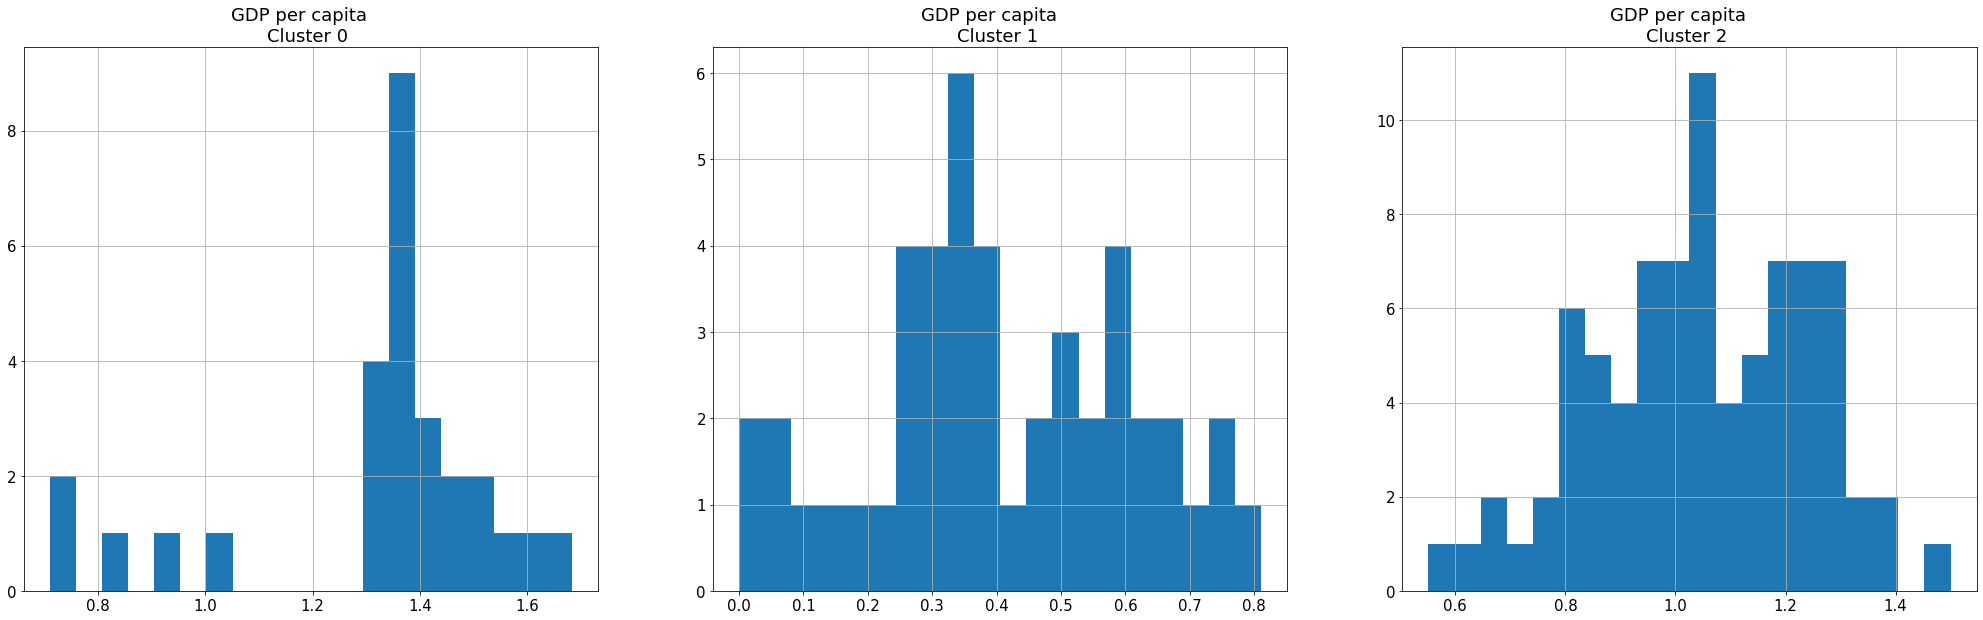

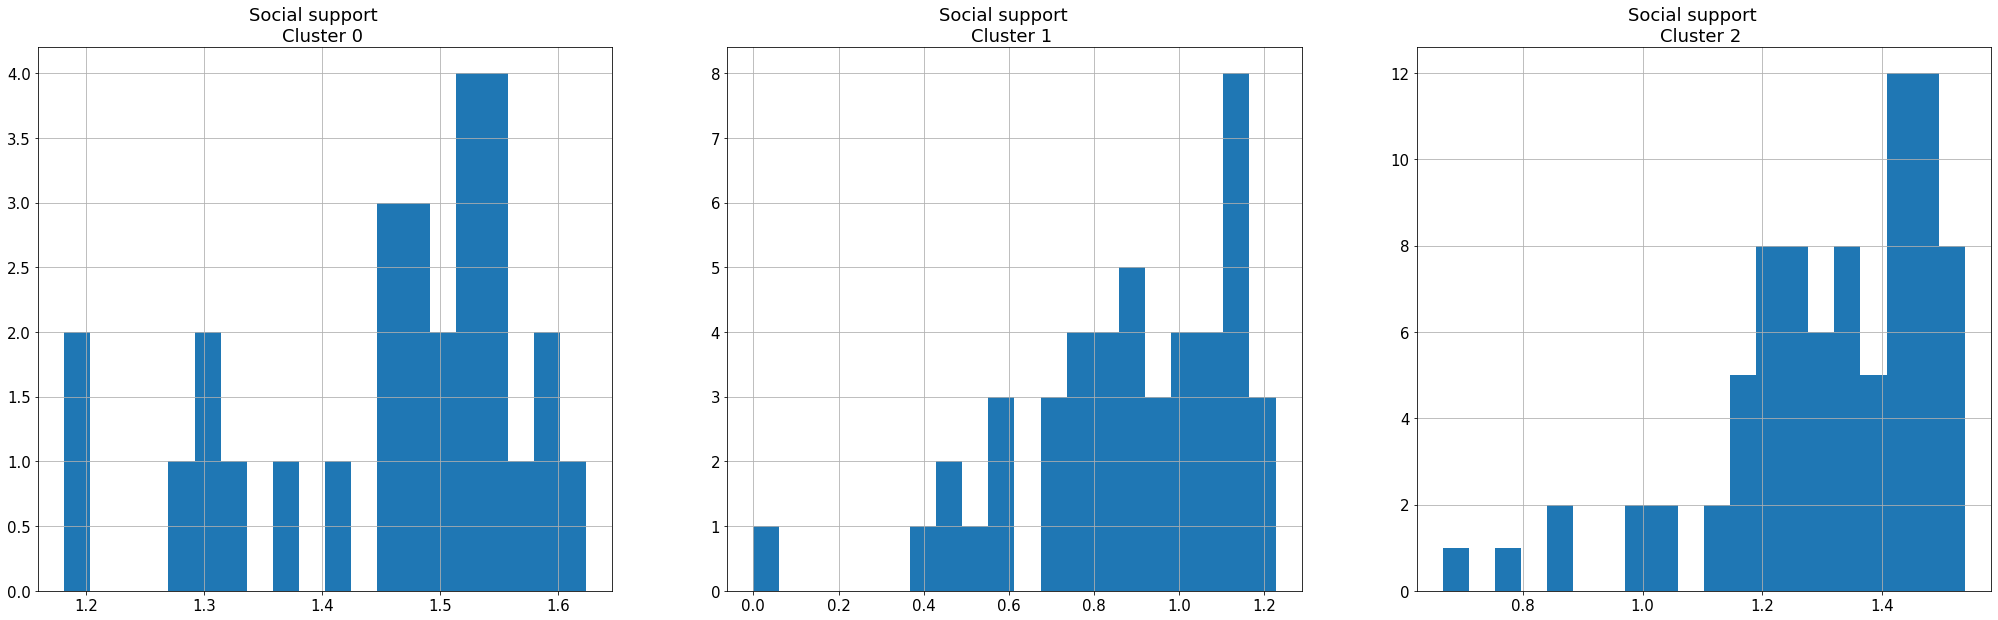

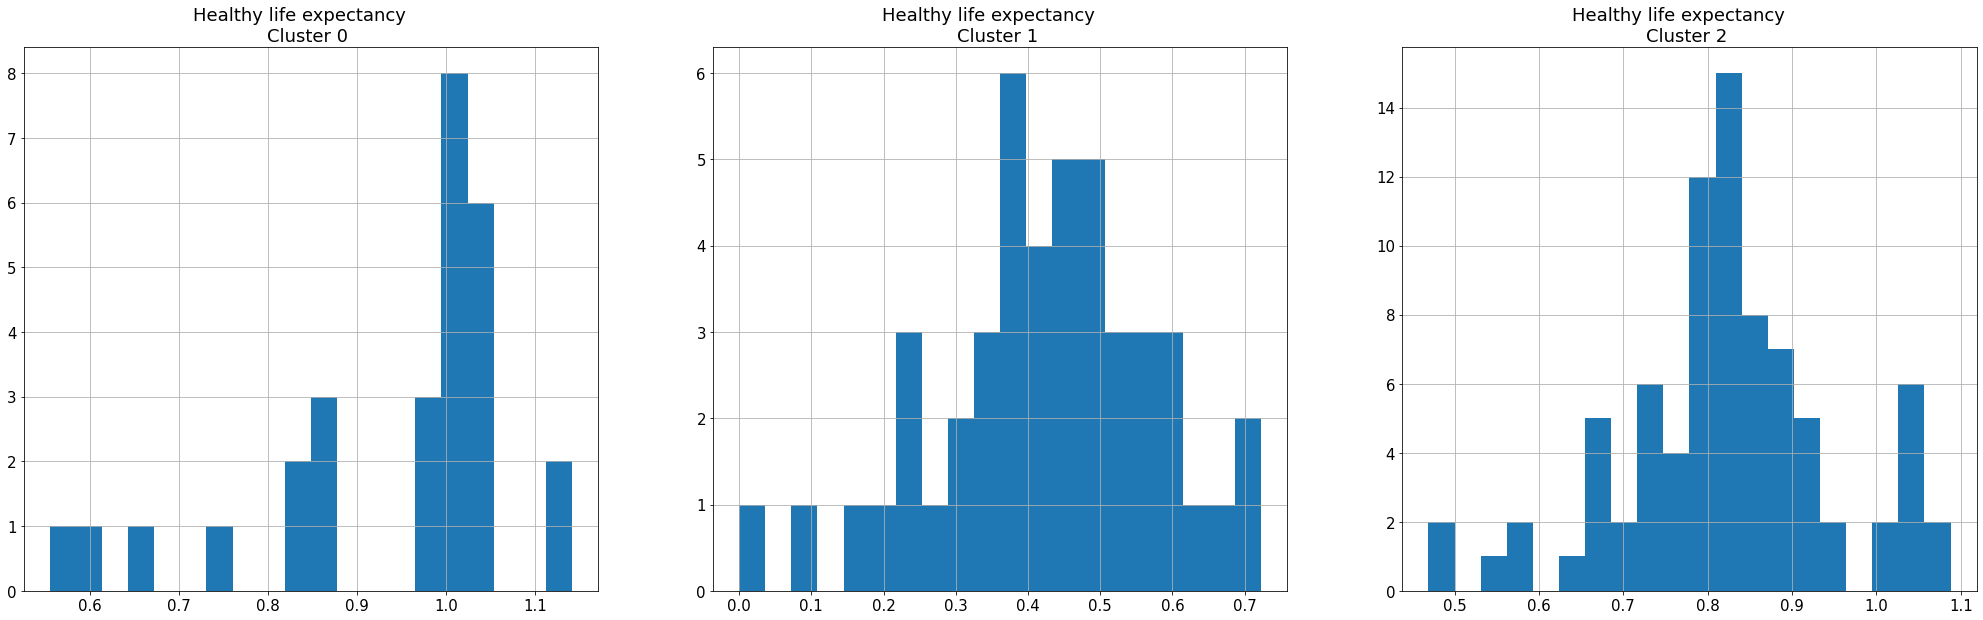

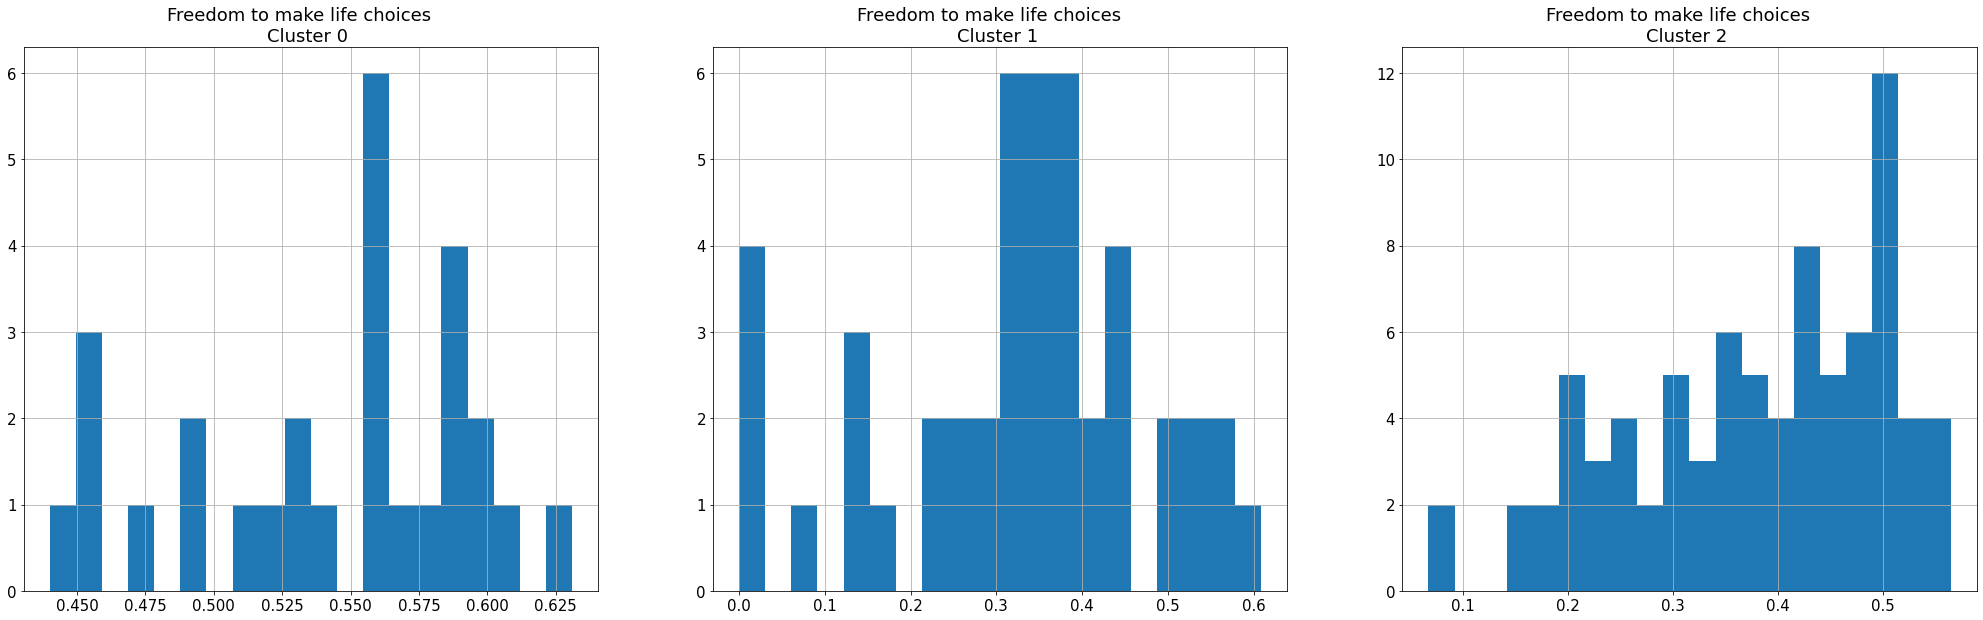

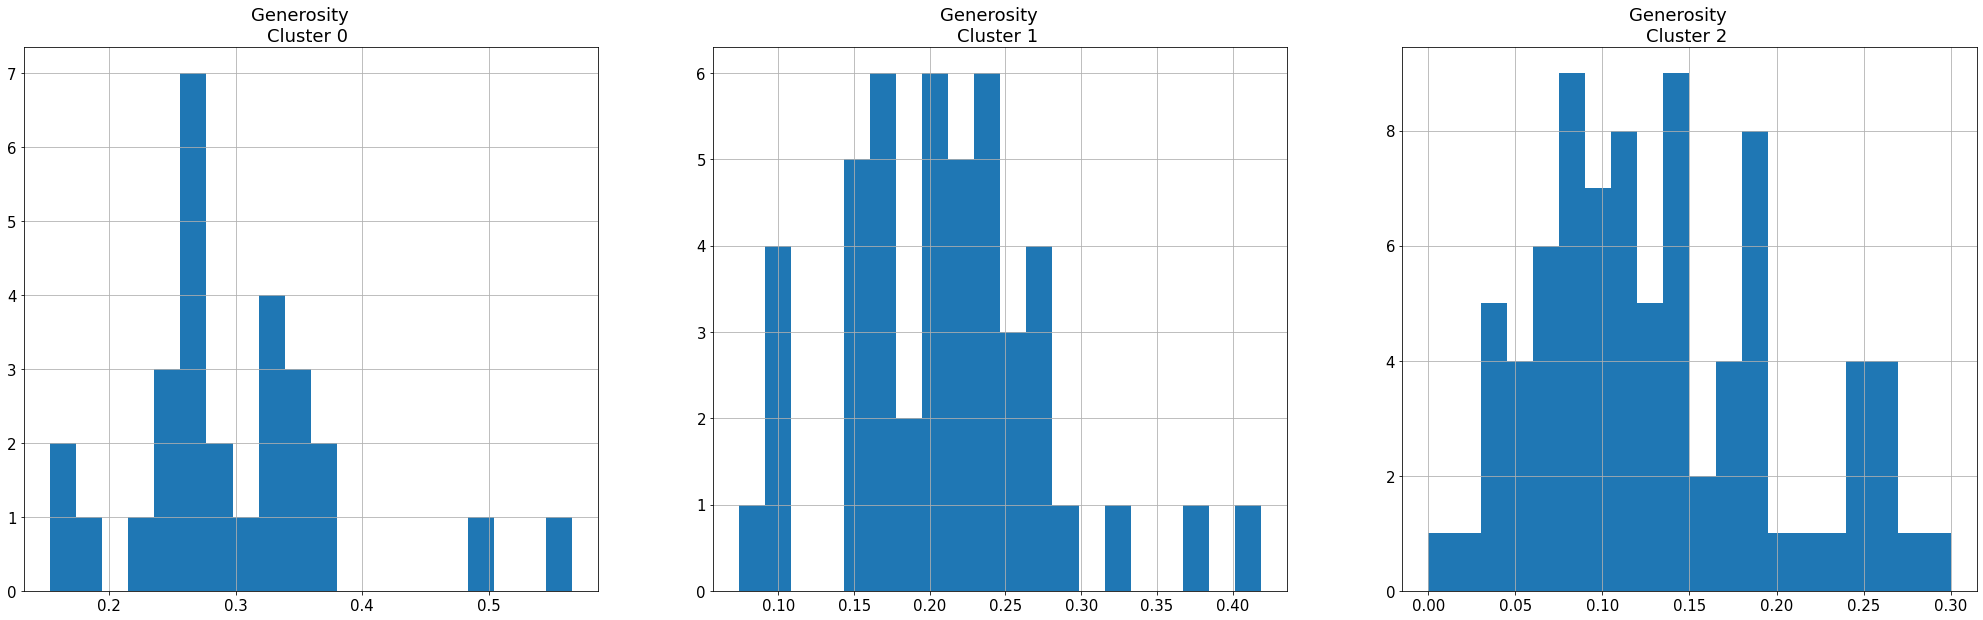

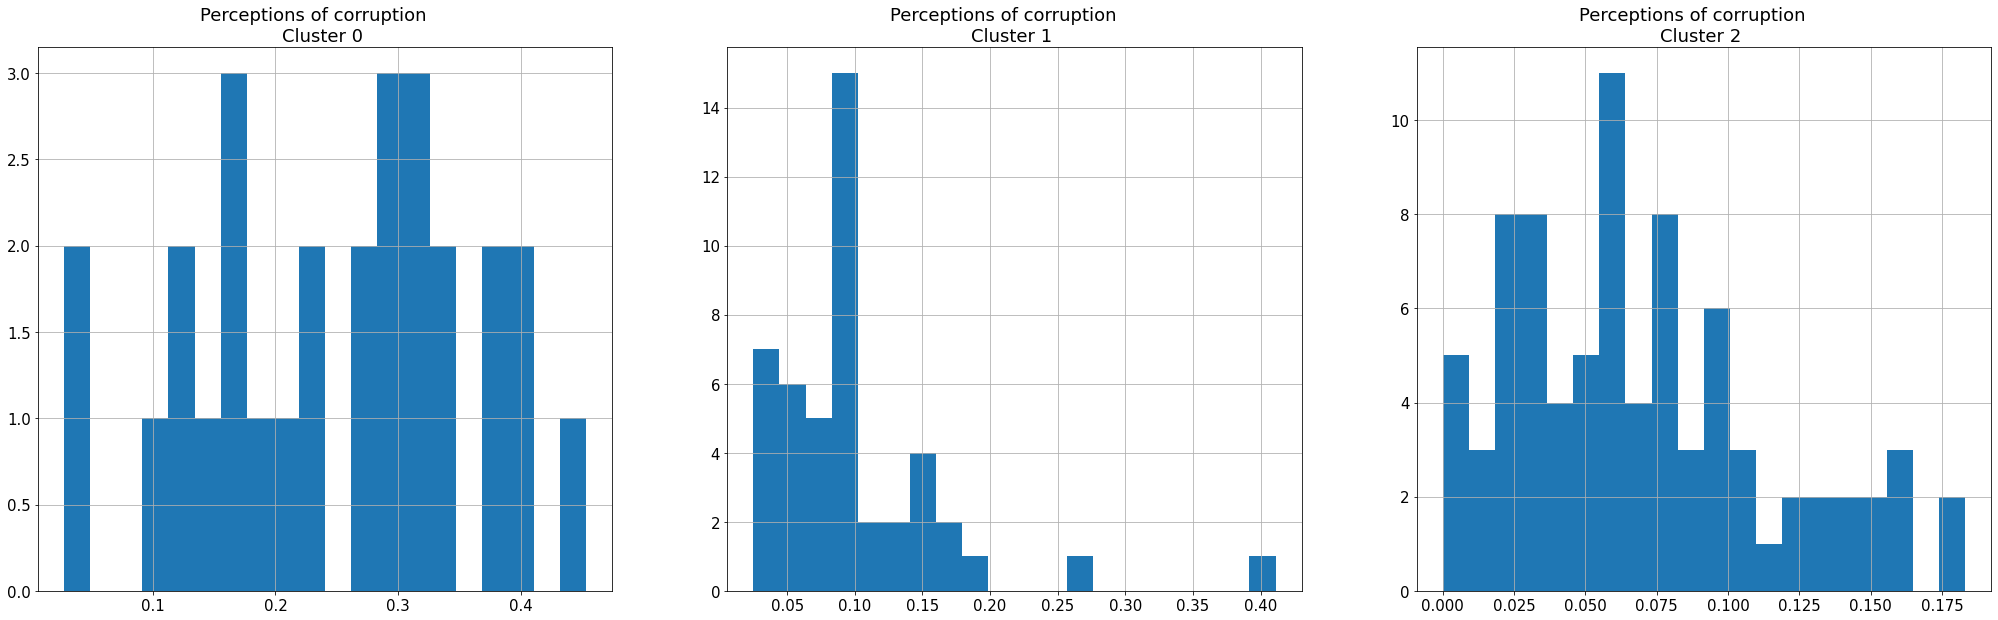

In [36]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



MINI CHALLENGE #5:
- Try the same model with 4 clusters 

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
col_labels=kmeans.labels_
cluster_center=kmeans.cluster_centers_
cluster_center = scaler.inverse_transform(cluster_center)
cluster_center = pd.DataFrame(data = cluster_center, columns = [df_seg.columns])
cluster_center

GDP per capita Social support Healthy life expectancy  \
0       1.393708       1.489625                0.985500   
1       0.721000       1.122636                0.681591   
2       1.065784       1.322405                0.823162   
3       0.361778       0.840778                0.377139   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     0.547375   0.274042                  0.274042  
1                     0.483182   0.283682                  0.104000  
2                     0.369689   0.119838                  0.070027  
3                     0.281028   0.198611                  0.089083

In [38]:
happy_df_cluster_new = pd.concat([happy_df, pd.DataFrame({'cluster':col_labels})], axis = 1)
happy_df_cluster_new

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        0  
1         0.252                      0.410        0  
2         0.271                      0.341        0  
3         0.354                      0.118        0  
4         0.322                      0.298        0  
..          ...                        ...      ...  
151       0.217                      0.411        1  
152       0.276                      0.147        1  
153       0.158                      0.025        3  
154       0.235                      0.035        3  
155       0.202                      0.091        3  

[156 rows x 10 columns]

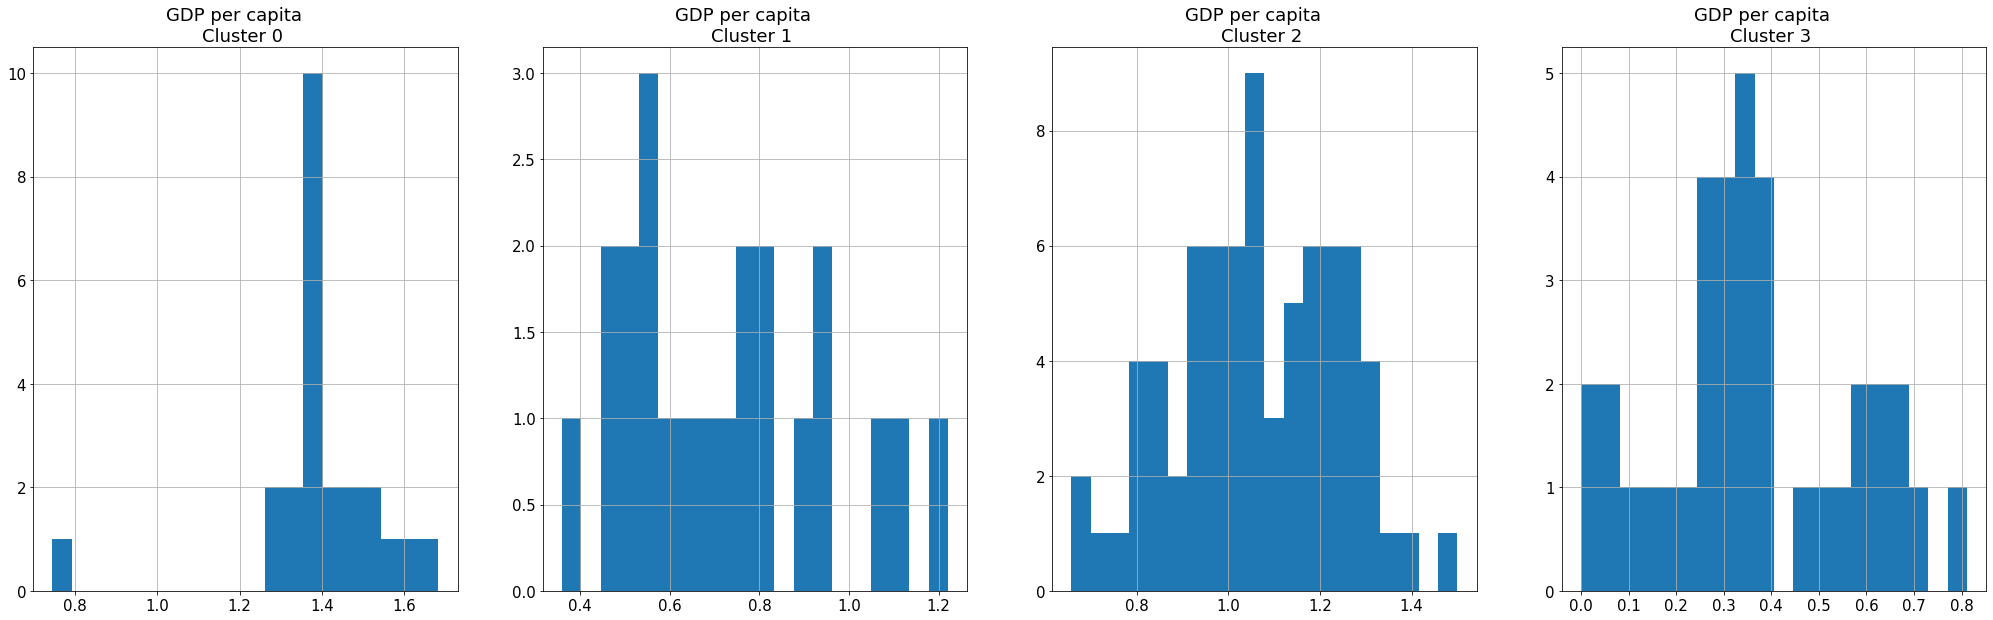

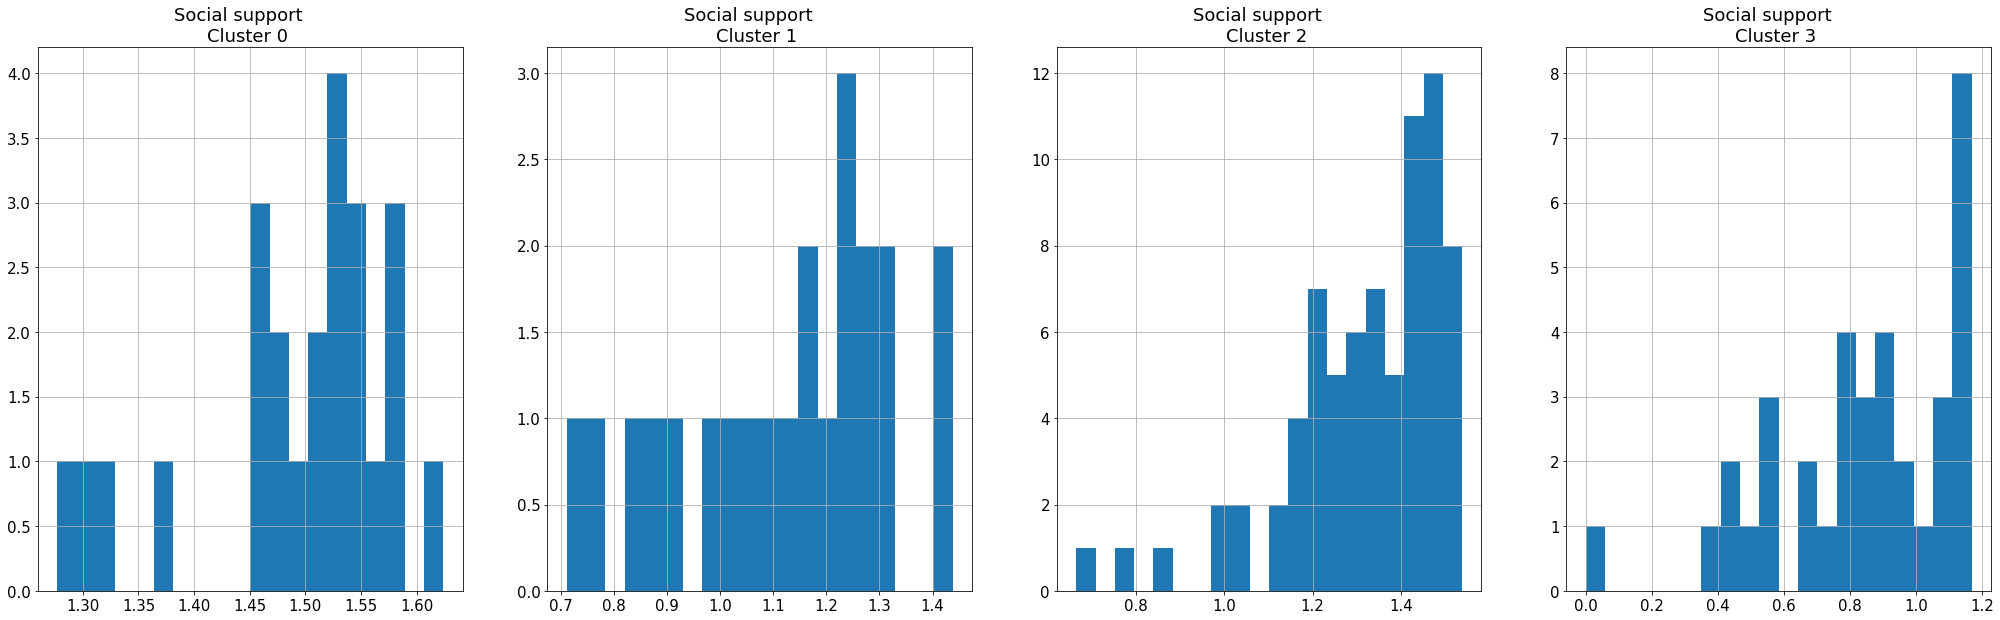

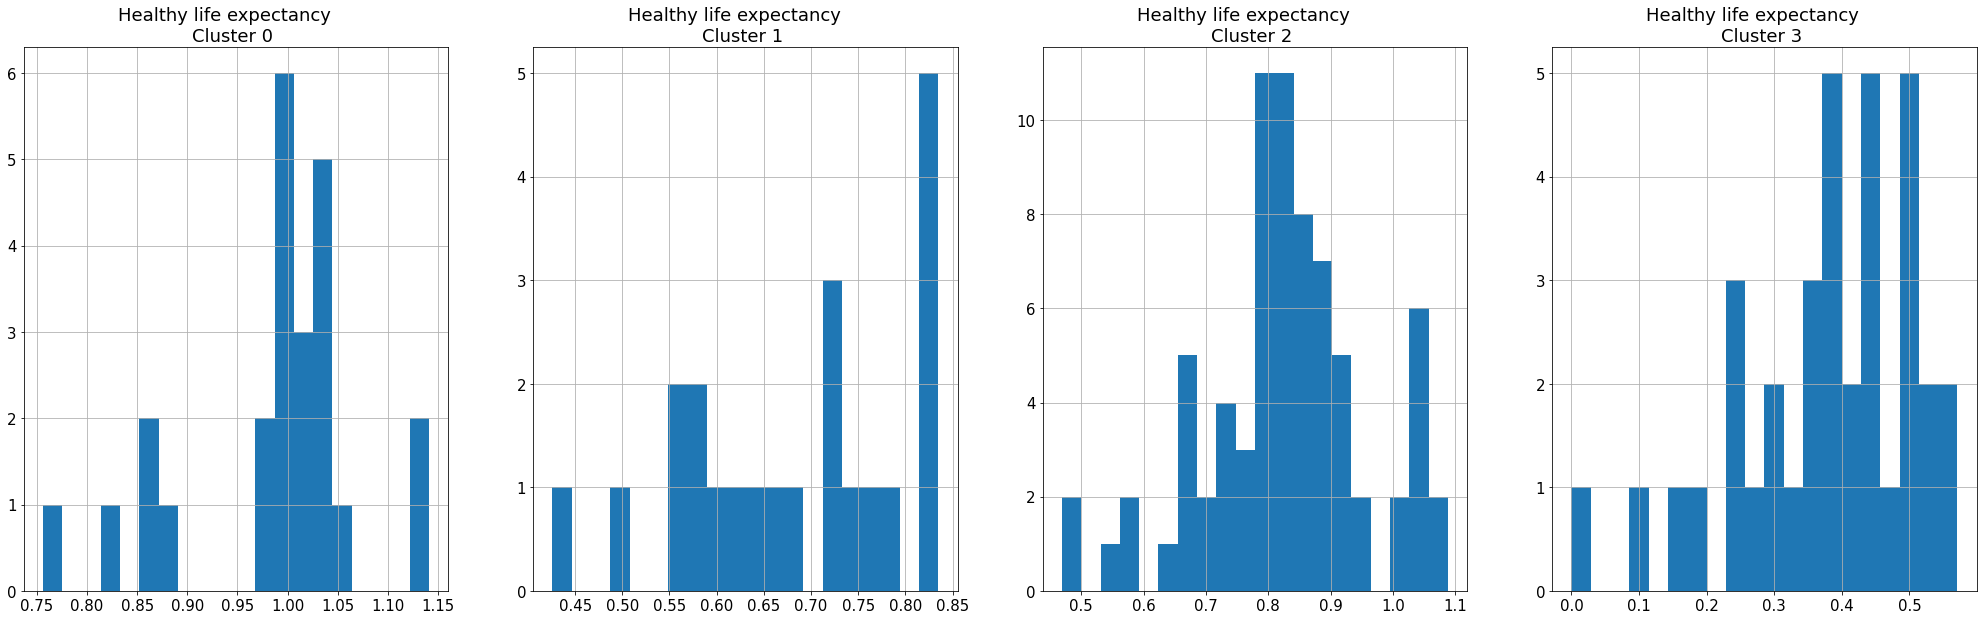

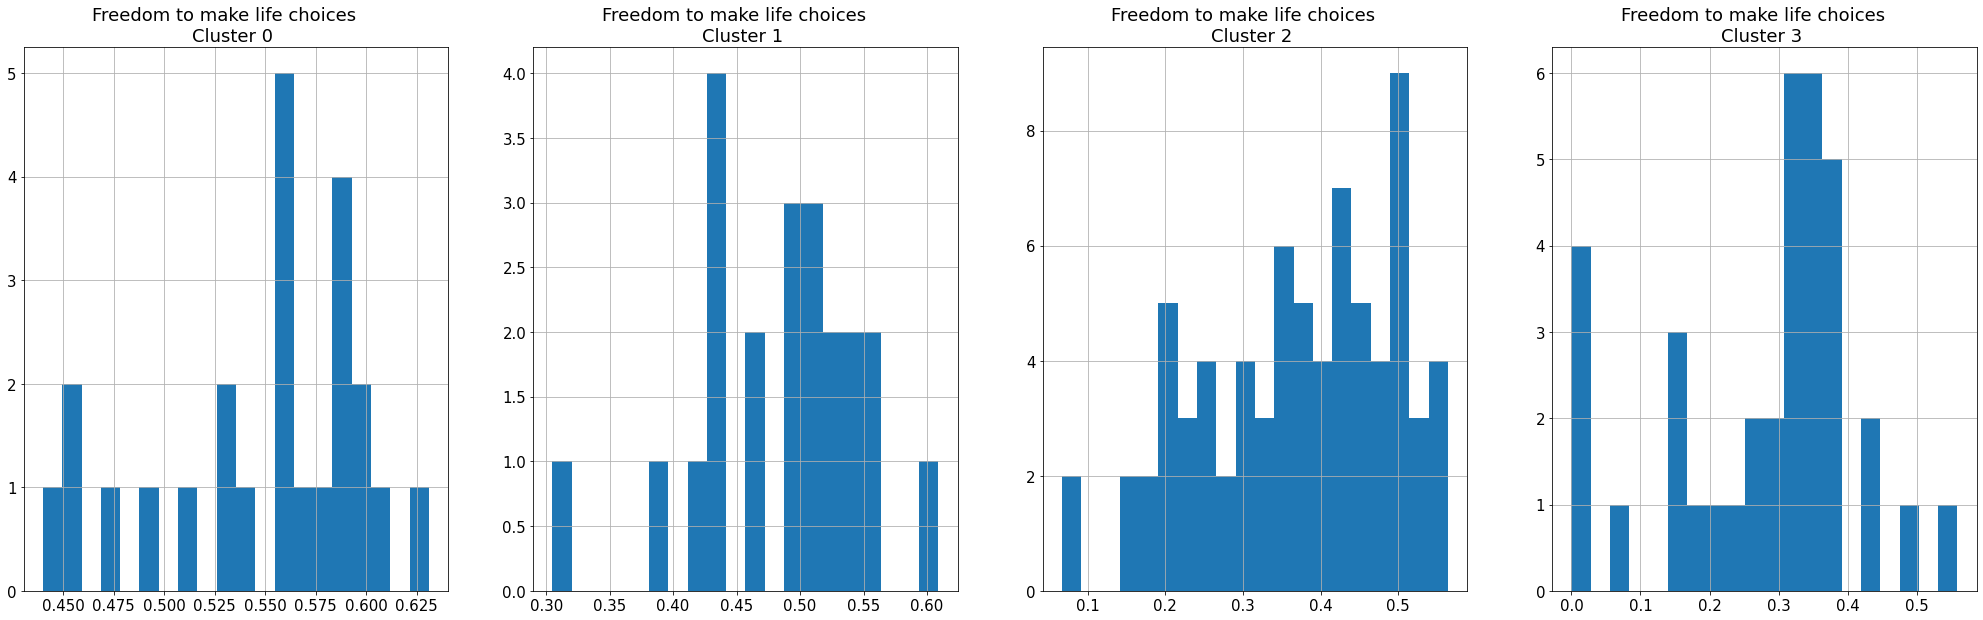

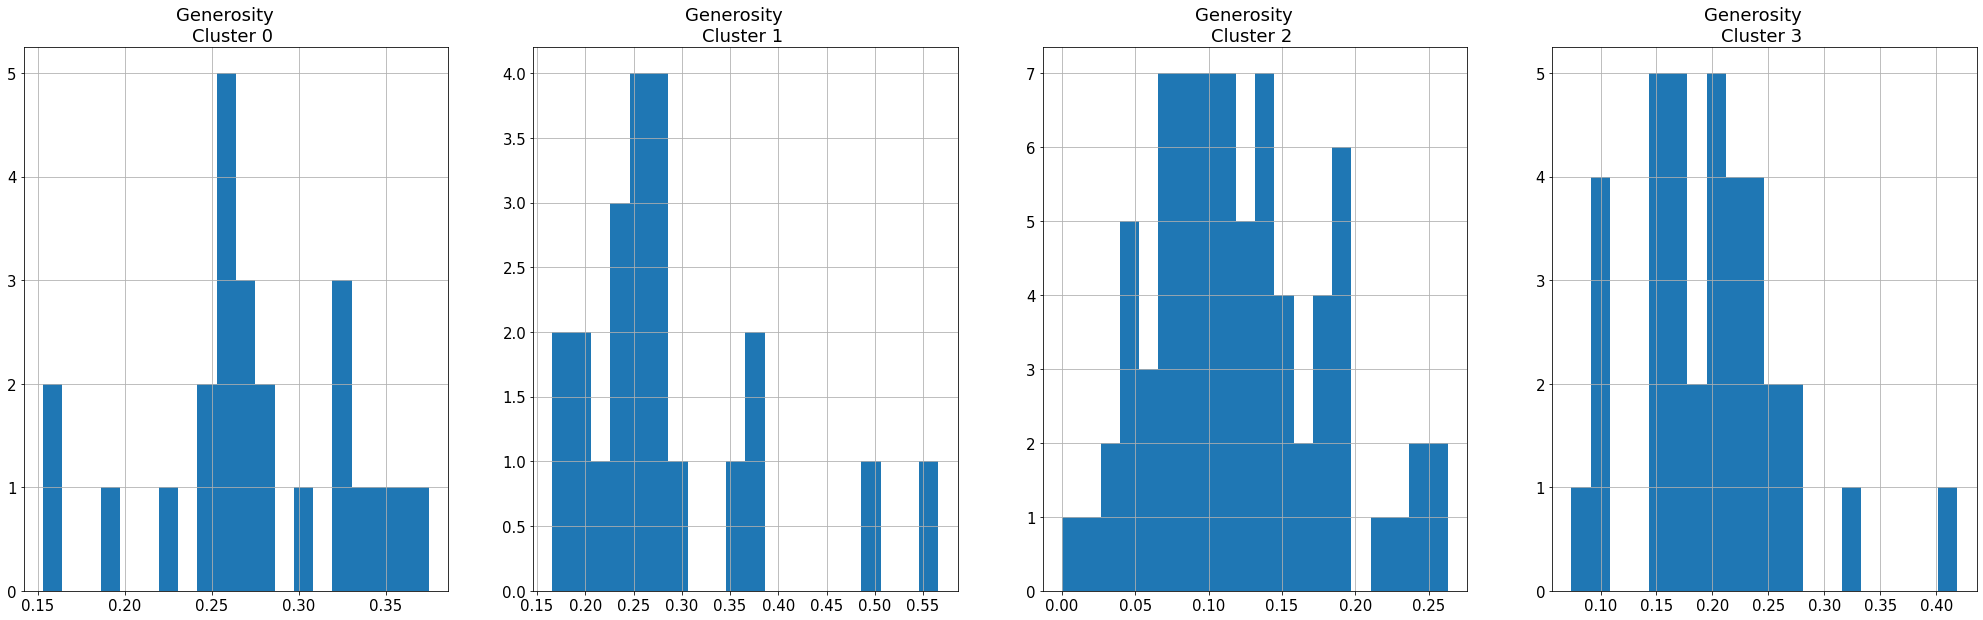

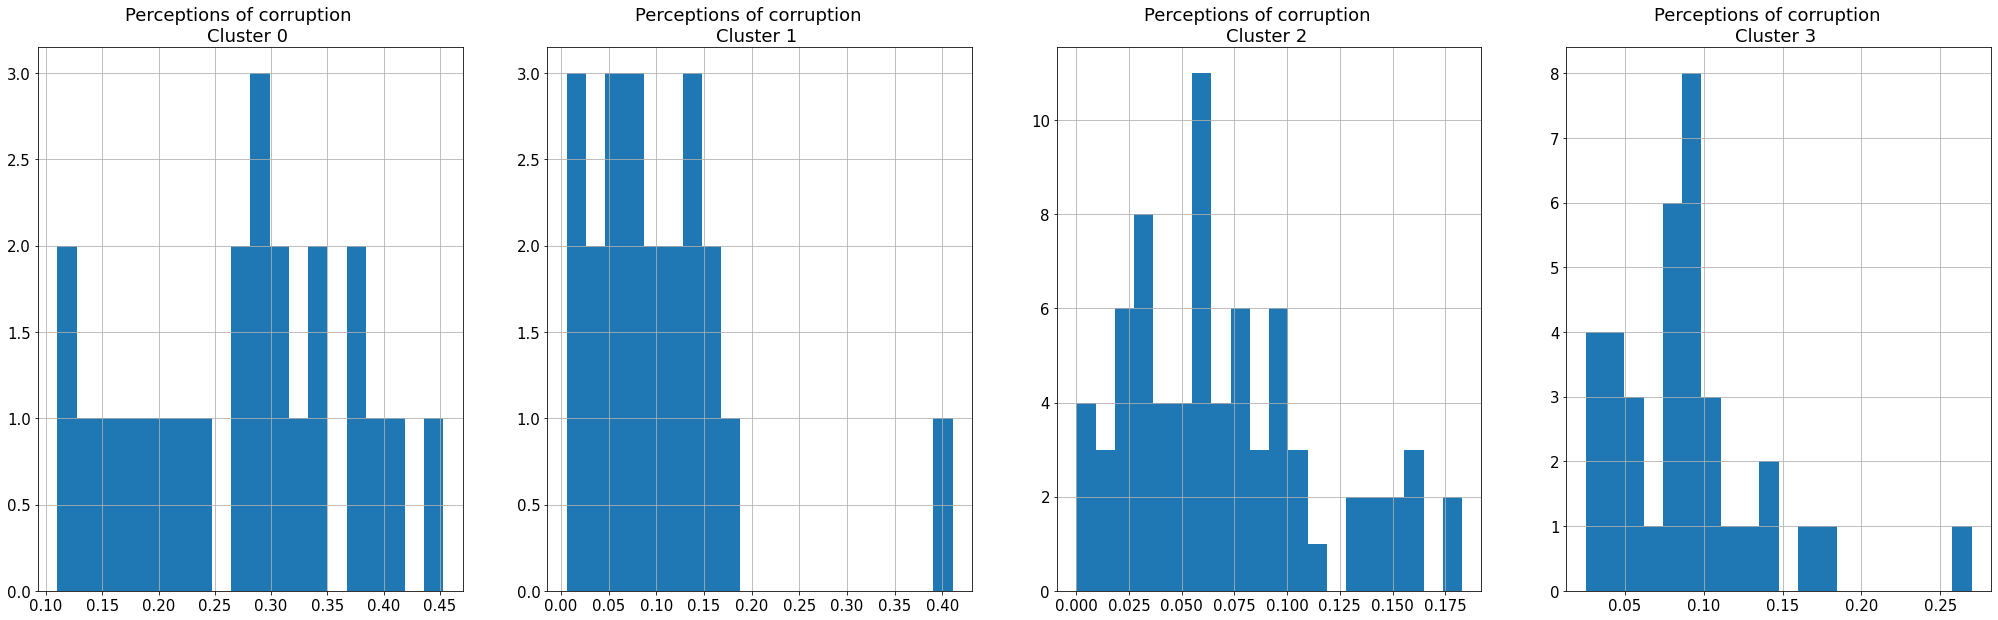

In [39]:
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = happy_df_cluster_new[happy_df_cluster_new['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()

# TASK #10: VISUALIZE THE CLUSTERS

In [40]:
happy_df_cluster

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        0  
1         0.252                      0.410        0  
2         0.271                      0.341        0  
3         0.354                      0.118        0  
4         0.322                      0.298        0  
..          ...                        ...      ...  
151       0.217                      0.411        1  
152       0.276                      0.147        1  
153       0.158                      0.025        1  
154       0.235                      0.035        1  
155       0.202                      0.091        1  

[156 rows x 10 columns]

In [41]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Score', color = "Country or region", hover_data = happy_df.columns,hover_name='Country or region',
          trendline = "ols")

fig.update_layout(title_text = 'Cluster vs Happiness Score')
fig.show()

In [42]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "GDP per capita",
           size = 'GDP per capita', color = "Country or region", hover_data = happy_df.columns,hover_name='Country or region',
          trendline = "ols")
fig.update_layout(title_text='Clusters vs GDP per capita')
fig.show()

In [43]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [44]:
figure = bubbleplot(dataset=happy_df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Generosity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Generosity",
    title='Clusters based Impact of Economy, Corruption and Generosity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

In [45]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)